install github copilot


# Gather points by IN geologic formation


 
1) In this notebook, we will establish historical groundwater chemistry by geologic formation.
2) We will follow this by correlating historical precipitation to groundwater chemistry.
3) And finally, predicting groundwater chemistry change over time through different carbon emissions scenarios.

In [2]:
"""import libraries"""
from pykml import parser
import pandas as pd
import geopandas as gpd
from os import path
from shapely.geometry import Point
import cartopy
import cmocean
import matplotlib.pyplot as plt
import utm

In [3]:

#read in GW chem data from IDNR
gw_filepath = r"C:\Users\janel\OneDrive\Documents\IU grad\Classes F23\EAS 690 Advanced Data Science\G690_Test\research_project\IDNR_GWchem\Data\GWCHEM_AA.xls"

# read in the data file, 
IDNR_gw_full = pd.read_excel(gw_filepath, sheet_name = "basins", header = 6, skiprows = 6)

# convert UTM to lat lon
IDNR_gw_full['lat'], IDNR_gw_full['lon'] = utm.to_latlon(IDNR_gw_full['UTME'], IDNR_gw_full['UTMN'], 16, northern=True)

#print(IDNR_gw_full.loc[0]['UTMN'])
#print(utm.to_latlon(IDNR_gw_full.loc[0]['UTMN'], IDNR_gw_full.loc[0]['UTME'], 16, northern=False))
#print("Results: ", IDNR_gw_full['UTMN'])
#print("results 2: ", IDNR_gw_full['UTME'])
#print(utm.to_latlon(IDNR_gw_full['UTMN'], IDNR_gw_full['UTME'], 16, northern=False))

# show the dataset
IDNR_gw_full

,ref.no,pub.no,samp.no,UTMN,UTME,COUNTY,TOWNSHIP,RANGE,SECTION,DEPTH,...,SEL,BOR,COMMENTS.1,Well type,Ref No.,Unnamed: 59,Sample #,Basin,lat,lon
0,85,NaN,WF-024,4451775,623650,18,20,9,6,165,...,NaN,NaN,NaN,B,85,NaN,WF-024,WF,40.207272,-85.547048
1,1302,NaN,WF-002,4450598,632343,18,20,10,7,76,...,NaN,NaN,NaN,U,1302,NaN,WF-002,WF,40.195345,-85.445177
2,1551,NaN,WF-003,4447960,637860,18,20,10,22,37,...,NaN,NaN,NaN,U,1551,NaN,WF-003,WF,40.170698,-85.380950
3,2577,NaN,WF-014,4456595,627750,18,21,9,22,96,...,NaN,NaN,NaN,B,2577,NaN,WF-014,WF,40.250068,-85.497927
4,2752,NaN,WF-011A,4459750,641860,18,21,10,12,121,...,NaN,NaN,NaN,B,2752,NaN,WF-011A,WF,40.276208,-85.331388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,265132,132U,KK-079,4596450,534950,46,36,1,31,175,...,NaN,NaN,NaN,U,265132,NaN,KK-079,KK,41.518925,-86.581129
1025,265226,5,SJ-021,4619950,562275,71,38,2,24,71,...,NaN,NaN,NaN,U,265226,NaN,SJ-021,SJ,41.728919,-86.251219
1026,266940,23,SJ-020,4615625,565825,71,37,3,5,200,...,NaN,NaN,NaN,UNKNOWN,266940,NaN,SJ-020,SJ,41.689681,-86.209016
1027,310076,110U,KK-168,4602125,522925,46,36,3,14,150,...,NaN,NaN,NaN,U,310076,NaN,KK-168,KK,41.570476,-86.725028


Now pair UTM coordinates with their formation as determined in the KML file

pykml to shapely, then do geometry (point vs polygon)
try getting individual shapefiles from google earth . use shape.ly "point and polygon" check stackoverflow

Read in shapefile with geologic formation polygons

In [4]:
#download a shapefile

shapefile = path.join("/Users/janel/OneDrive/Documents/IU grad/Classes F23/EAS 690 Advanced Data Science/G690_Test/research_project/data/geo_units/IN_geol_poly.shp")

gpd.read_file(shapefile)

,STATE,ORIG_LABEL,SGMC_LABEL,UNIT_LINK,REF_ID,GENERALIZE,SRC_URL,URL,geometry
0,IN,D,D;0,IND;0,IN004,"Sedimentary, carbonate",http://maps.indiana.edu/layerGallery.html?cate...,https://mrdata.usgs.gov/geology/state/sgmc-uni...,"POLYGON ((-87.44982 41.13308, -87.45839 41.132..."
1,IN,D,D;0,IND;0,IN004,"Sedimentary, carbonate",http://maps.indiana.edu/layerGallery.html?cate...,https://mrdata.usgs.gov/geology/state/sgmc-uni...,"POLYGON ((-86.97157 40.77332, -86.97353 40.773..."
2,IN,D,D;0,IND;0,IN004,"Sedimentary, carbonate",http://maps.indiana.edu/layerGallery.html?cate...,https://mrdata.usgs.gov/geology/state/sgmc-uni...,"POLYGON ((-87.37957 40.75348, -87.38177 40.751..."
3,IN,D,D;0,IND;0,IN004,"Sedimentary, carbonate",http://maps.indiana.edu/layerGallery.html?cate...,https://mrdata.usgs.gov/geology/state/sgmc-uni...,"POLYGON ((-85.50110 39.84990, -85.50347 39.849..."
4,IN,D,D;0,IND;0,IN004,"Sedimentary, carbonate",http://maps.indiana.edu/layerGallery.html?cate...,https://mrdata.usgs.gov/geology/state/sgmc-uni...,"POLYGON ((-85.71591 38.79307, -85.71443 38.792..."
...,...,...,...,...,...,...,...,...,...
600,IN,S3,S3;0,INS3;0,IN004,"Sedimentary, carbonate",http://maps.indiana.edu/layerGallery.html?cate...,https://mrdata.usgs.gov/geology/state/sgmc-uni...,"POLYGON ((-87.25816 41.61673, -87.26003 41.614..."
601,IN,S3,S3;0,INS3;0,IN004,"Sedimentary, carbonate",http://maps.indiana.edu/layerGallery.html?cate...,https://mrdata.usgs.gov/geology/state/sgmc-uni...,"POLYGON ((-85.45559 41.14164, -85.45806 41.138..."
602,IN,S3,S3;0,INS3;0,IN004,"Sedimentary, carbonate",http://maps.indiana.edu/layerGallery.html?cate...,https://mrdata.usgs.gov/geology/state/sgmc-uni...,"POLYGON ((-87.52223 41.71193, -87.52016 41.708..."
603,IN,S3,S3;0,INS3;0,IN004,"Sedimentary, carbonate",http://maps.indiana.edu/layerGallery.html?cate...,https://mrdata.usgs.gov/geology/state/sgmc-uni...,"POLYGON ((-85.73187 39.56519, -85.74046 39.565..."


In [5]:
#create a geodataframe from the IN geological formations shapefile
geo_formations = gpd.GeoDataFrame.from_file(shapefile)

In [6]:
#Create a geodataframe from coordinates in IDNR excel file
IDNR_gw_full['coords'] = list(zip(IDNR_gw_full['lat'], IDNR_gw_full['lon']))
IDNR_gw_full['coords'] = IDNR_gw_full['coords'].apply(Point)

IDNR_gw_pts = gpd.GeoDataFrame(IDNR_gw_full, geometry = 'coords', crs = geo_formations.crs)

In [7]:
pointsInPolygons = gpd.tools.sjoin(IDNR_gw_pts, geo_formations, predicate='within', how='left')

In [8]:
pointsInPolygons

,ref.no,pub.no,samp.no,UTMN,UTME,COUNTY,TOWNSHIP,RANGE,SECTION,DEPTH,...,coords,index_right,STATE,ORIG_LABEL,SGMC_LABEL,UNIT_LINK,REF_ID,GENERALIZE,SRC_URL,URL
0,85,NaN,WF-024,4451775,623650,18,20,9,6,165,...,POINT (40.20727 -85.54705),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1302,NaN,WF-002,4450598,632343,18,20,10,7,76,...,POINT (40.19534 -85.44518),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1551,NaN,WF-003,4447960,637860,18,20,10,22,37,...,POINT (40.17070 -85.38095),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2577,NaN,WF-014,4456595,627750,18,21,9,22,96,...,POINT (40.25007 -85.49793),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2752,NaN,WF-011A,4459750,641860,18,21,10,12,121,...,POINT (40.27621 -85.33139),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,265132,132U,KK-079,4596450,534950,46,36,1,31,175,...,POINT (41.51893 -86.58113),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1025,265226,5,SJ-021,4619950,562275,71,38,2,24,71,...,POINT (41.72892 -86.25122),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1026,266940,23,SJ-020,4615625,565825,71,37,3,5,200,...,POINT (41.68968 -86.20902),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1027,310076,110U,KK-168,4602125,522925,46,36,3,14,150,...,POINT (41.57048 -86.72503),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
"""read in the data"""
from os import path

kml_file = path.join("/Users/janel/OneDrive/Documents/IU grad/Classes F23/EAS 690 Advanced Data Science/G690_Test/research_project/data/ingeol.kml")

# Dictionary: zoneName->Multigeometry from zone coordinates
placeDict = dict()

# print("testing: ", help(root))
with open(kml_file) as f:
    root = parser.parse(f).getroot()
    print("testing: ", root["Document"].tag)
    #doc = parser.parse(f)


for place in root.Document.Placemark:
    print(" ")
    print(place.tag)
    print(place.name)
    print(place.MultiGeometry.Polygon)
    #placeDict.append()

placeDict

# 1: Open KML file
# 2: Parse it, see stackoverflow page
# 3: Create a zoneName->Polygon dictionary
# 4: Interate through all 1028 lines in your main data sheet
# 5: for loop. for each of those lines, construct a Point using your lat/long coordinates
#       for (name, Polygon in my dictionary)
#              check if my lat/long point is inside that Polygon 
#                       if yes, then populate the zone column for that row with your found zone name 
#                       if no, continue

testing:  {http://earth.google.com/kml/2.2}Document
 
{http://earth.google.com/kml/2.2}Placemark
Antrim Shale

 
{http://earth.google.com/kml/2.2}Placemark
Blue River Group

 
{http://earth.google.com/kml/2.2}Placemark
Bond Formation

 
{http://earth.google.com/kml/2.2}Placemark
Borden Group

 
{http://earth.google.com/kml/2.2}Placemark
Buffalo Wallow Group

 
{http://earth.google.com/kml/2.2}Placemark
Carbondale Group

 
{http://earth.google.com/kml/2.2}Placemark
Coldwater Shale

 
{http://earth.google.com/kml/2.2}Placemark
Dillsboro Formation

 
{http://earth.google.com/kml/2.2}Placemark
Ellsworth Shale

 
{http://earth.google.com/kml/2.2}Placemark
Kope Formation

 
{http://earth.google.com/kml/2.2}Placemark
Lexington Limestone

 
{http://earth.google.com/kml/2.2}Placemark
Louisville Limestone through Brassfield Limestone

 
{http://earth.google.com/kml/2.2}Placemark
Mattoon Formation

 
{http://earth.google.com/kml/2.2}Placemark
Muscatatuck Group

 
{http://earth.google.com/kml/2.2}

{}

do i need this cell? v

NameError: name 'tcw' is not defined

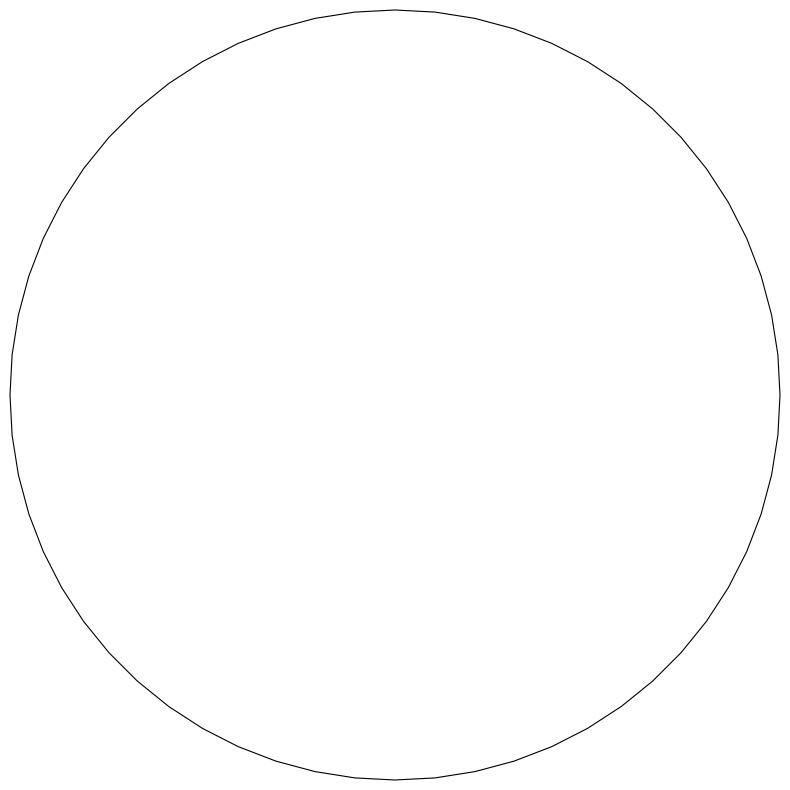

In [10]:
"""map of data"""


#create map centered on indiana
clat = 39.1653
clon = -86.5264
projection = cartopy.crs.Orthographic(clon, clat)
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=projection))

# plot the data
tcw.plot(
    ax = ax,
    transform = cartopy.crs.PlateCarree(),
    cmap = cmocean.cm.rain,
    cbar_kwargs = dict(label = f'Precipitable Water [mm]'),
    vmin = 0,
    vmax = 60,
)

# get the time of the timestep
time = tcw.time.values

# convert it to a datetime object
time = pd.to_datetime(time)

# add a title with a nicely formatted date
ax.set_title(time.strftime("%Y-%m-%d %H:%M UTC"), fontsize=18)

# add coastlines
ax.coastlines(alpha = 0.3)

# save the plot
output_file = os.path.join(output_dir, f"tcw_{i:05d}.png")
fig.savefig(output_file, dpi=300, bbox_inches="tight")

plt.show()